# 🔄 Stable Diffusion Image-to-Image Demo

Use an input image and a prompt to generate a new image using Stable Diffusion.


## 📝 Overview

This notebook demonstrates how to use **Image-to-Image** generation with Stable Diffusion to transform an input image based on a prompt.

You'll learn how to:
- Load a starting image
- Use `StableDiffusionImg2ImgPipeline`
- Apply prompts to guide the transformation of an image


In [5]:
!pip install diffusers transformers accelerate safetensors Pillow matplotlib --quiet

In [6]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16
).to("cuda" if torch.cuda.is_available() else "cpu")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### 🖼️ Load Input Image

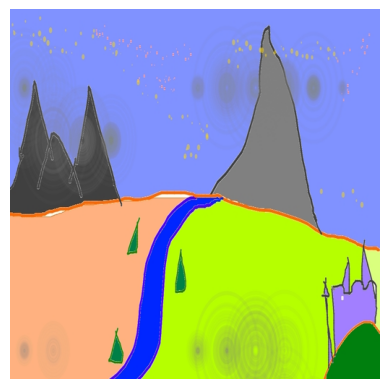

In [7]:
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
init_image = Image.open(requests.get(url, stream=True).raw).convert("RGB").resize((512, 512))
init_image.save("img2img_input.png")

plt.imshow(init_image)
plt.axis("off")
plt.show()

### 🔁 Generate New Image

  0%|          | 0/37 [00:00<?, ?it/s]

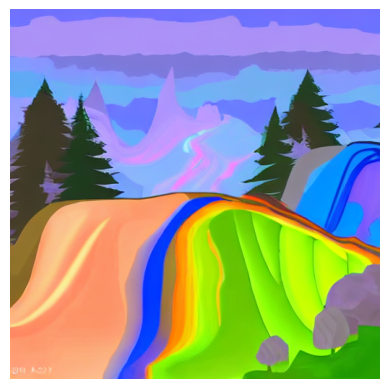

In [8]:
prompt = "A fantasy mountain range with glowing waterfalls"
strength = 0.75  # how much to transform the original (0 = original, 1 = full gen)

output = pipe(prompt=prompt, image=init_image, strength=strength, guidance_scale=7.5).images[0]
output.save("img2img_output.png")

plt.imshow(output)
plt.axis("off")
plt.show()


## ✅ Summary

Using image-to-image generation, you can blend the structure of an image with creative guidance from a prompt—ideal for concept sketching, enhancement, and stylization.
